In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv("/Users/marta/Adalab/ejercicios-de-Adalab/MODULO 3/File/marketing_AB.csv", index_col= 0)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [5]:
df.tail()

,user id,test group,converted,total ads,most ads day,most ads hour
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23
588100,1237779,ad,False,1,Tuesday,23


In [9]:
df.sample(12)

,user id,test group,converted,total ads,most ads day,most ads hour
258258,1014098,ad,False,4,Monday,11
37348,1587424,ad,False,503,Tuesday,12
86732,1049316,ad,False,78,Monday,15
159573,1010146,ad,False,142,Monday,13
141473,1160865,ad,False,45,Sunday,14
119107,1514363,ad,False,6,Saturday,23
231408,1647581,ad,False,24,Friday,22
45211,1199598,ad,False,21,Saturday,22
387442,1293080,ad,False,7,Friday,11
250268,1246065,ad,False,42,Sunday,23


In [10]:
df.shape

(588101, 6)

In [11]:
df["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [12]:
df.isna().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [13]:
df.groupby("test group")["converted"].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='test group', ylabel='Count'>

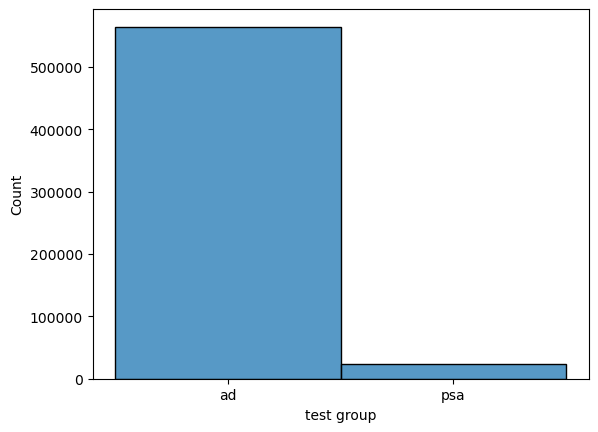

In [ ]:
sns.histplot(x="test group", data = df)   # no nos valdria al ser 0 y 1 o true o false

<Axes: xlabel='test group', ylabel='count'>

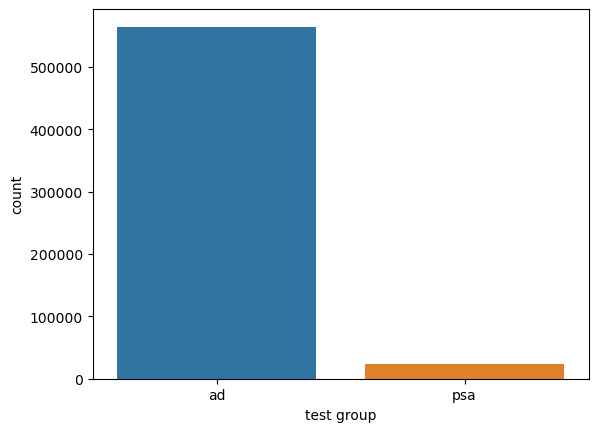

In [15]:
sns.countplot(x ="test group", data = df) 

In [26]:
tabla_cont = pd.crosstab(df["test group"], df["converted"])
tabla_cont

converted,False,True
test group,,
ad,550154,14423
psa,23104,420


In [22]:
chi2_contingency(tabla_cont)

Chi2ContingencyResult(statistic=54.005823883685245, pvalue=1.9989623063390075e-13, dof=1, expected_freq=array([[550327.71899045,  14249.28100955],
       [ 22930.28100955,    593.71899045]]))

In [24]:
_, p_value, _, _ = chi2_contingency (tabla_cont)

print(p_value)

1.9989623063390075e-13
